In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, datasets
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

In [5]:
train =pd.read_csv(r'C:\Users\user\Desktop\kaggle data new\train.csv')
test = pd.read_csv(r'C:\Users\user\Desktop\kaggle data new\test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
train_data = train.drop('label',axis=1)
train_label=train['label']

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,train_label,test_size=0.2,random_state=1)


In [14]:
X_train = np.reshape(np.array(X_train), (X_train.shape[0],28,28,1))
X_test = np.reshape(np.array(X_test), (X_test.shape[0],28,28,1))
test_data=np.reshape(np.array(test), (test.shape[0],28,28,1))

In [15]:
X_train.shape

(33600, 28, 28, 1)

In [16]:
train_label=Y_train.values
test_label=Y_test.values

In [17]:
train_label

array([1, 3, 2, ..., 2, 1, 1], dtype=int64)

In [18]:
Y_train=to_categorical(train_label)
Y_test=to_categorical(test_label)

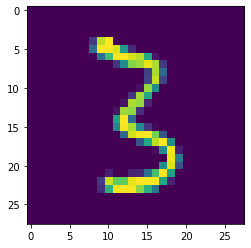

In [20]:
plt.imshow(X_train[44])

# Build a CNN model

In [21]:
model=models.Sequential()
model.add(Conv2D(16,(5,5),strides=(1,1),padding='valid',input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(5,5),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(X_train,Y_train,batch_size=10,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
3360/3360 [==============================] - 51s 14ms/step - loss: 0.3634 - accuracy: 0.9232 - val_loss: 0.1257 - val_accuracy: 0.9630
Epoch 2/10
3360/3360 [==============================] - 45s 13ms/step - loss: 0.1172 - accuracy: 0.9676 - val_loss: 0.1039 - val_accuracy: 0.9726
Epoch 3/10
3360/3360 [==============================] - 45s 13ms/step - loss: 0.1092 - accuracy: 0.9696 - val_loss: 0.1095 - val_accuracy: 0.9682
Epoch 4/10
3360/3360 [==============================] - 45s 13ms/step - loss: 0.0914 - accuracy: 0.9762 - val_loss: 0.1485 - val_accuracy: 0.9649
Epoch 5/10
3360/3360 [==============================] - 45s 13ms/step - loss: 0.0906 - accuracy: 0.9771 - val_loss: 0.0854 - val_accuracy: 0.9775
Epoch 6/10
3360/3360 [==============================] - 45s 13ms/step - loss: 0.0798 - accuracy: 0.9785 - val_loss: 0.0964 - val_accuracy: 0.9767
Epoch 7/10
3360/3360 [==============================] - 113s 34ms/step - loss: 0.0785 - accuracy: 0.9805 - val_loss: 0.0849 

visulising the model accuracy

In [24]:
ev=model.evaluate(X_test,Y_test)
print("val_loss {} , val_acc {}".format(ev[0],ev[1]))

263/263 [==============================] - 3s 11ms/step - loss: 0.1423 - accuracy: 0.9783
val_loss 0.14225448668003082 , val_acc 0.9783333539962769


In [25]:
df_loss_acc = pd.DataFrame(history.history)
df_loss=df_loss_acc[['loss','val_loss']]
df_acc=df_loss_acc[['accuracy','val_accuracy']]

<AxesSubplot:>

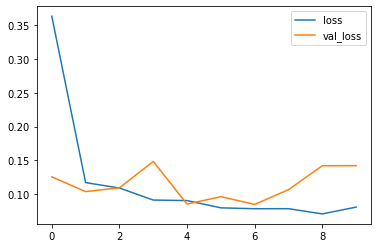

In [26]:
df_loss.plot()

<AxesSubplot:>

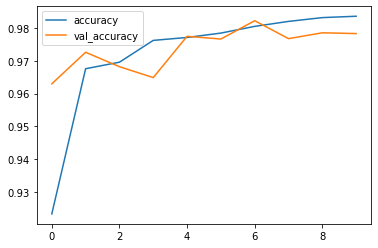

In [27]:
df_acc.plot()

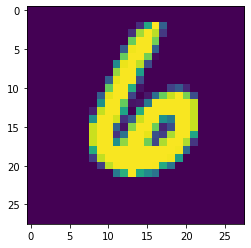

In [28]:
plt.imshow(test_data[50])

In [29]:
y_pred= model.predict_classes(test_data)
print('predicted value of the image',(y_pred[50]))

C:\Users\user\anaconda3\anac\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predicted value of the image 6


In [30]:
y_pred.shape

(28000,)

In [31]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)),
                         "Label": y_pred})
submissions.to_csv("Submission(3).csv", index=False, header=True)

In [33]:
submissions.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
